<a href="https://colab.research.google.com/github/spdr-lily/Descomplica-Data-Science/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Vendas

Construção de um modelo de regressão linear para prever vendas futuras com base em dados históricos.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
# Criação e Manipulação da Base de Dados de vendas mensais e eventos promocionai:
np.random.seed(42)
meses = np.arange(1, 25)
vendas = np.random.normal(200, 50, 24)
eventos = np.random.choice([0, 1], size=24)
df_vendas = pd.DataFrame({
    'Meses': meses,
    'Vendas': vendas,
    'Eventos': eventos
})

In [16]:
# Divisão dos Dados:
x_vendas = df_vendas[['Meses', 'Eventos']]
y_vendas = df_vendas['Vendas']
x_train_vendas, x_test_vendas, y_train_vendas, y_test_vendas = train_test_split(x_vendas, y_vendas, test_size=0.3, random_state=42)

In [17]:
# Construção e Avaliação do Modelo de regressão linear:
model_vendas = LinearRegression()
model_vendas.fit(x_train_vendas, y_train_vendas)
y_pred_vendas = model_vendas.predict(x_test_vendas)
mse_vendas = mean_squared_error(y_test_vendas, y_pred_vendas)
r2_vendas = r2_score(y_test_vendas, y_pred_vendas)

print(f'Erro Médio Quadrático: {mse_vendas}')
print(f'Coeficiente de Determinação (R²): {r2_vendas}')

Erro Médio Quadrático: 3048.9676839648832
Coeficiente de Determinação (R²): -1.103641785560324


In [23]:
# Organizando os dados para plotagem
df_resultado = pd.DataFrame({
    'Meses': x_test_vendas['Meses'],
    'Previsoes': y_pred_vendas,
    'Reais': y_test_vendas
})

In [24]:
# Ordena os dados por 'Meses'
df_resultado = df_resultado.sort_values(by='Meses')

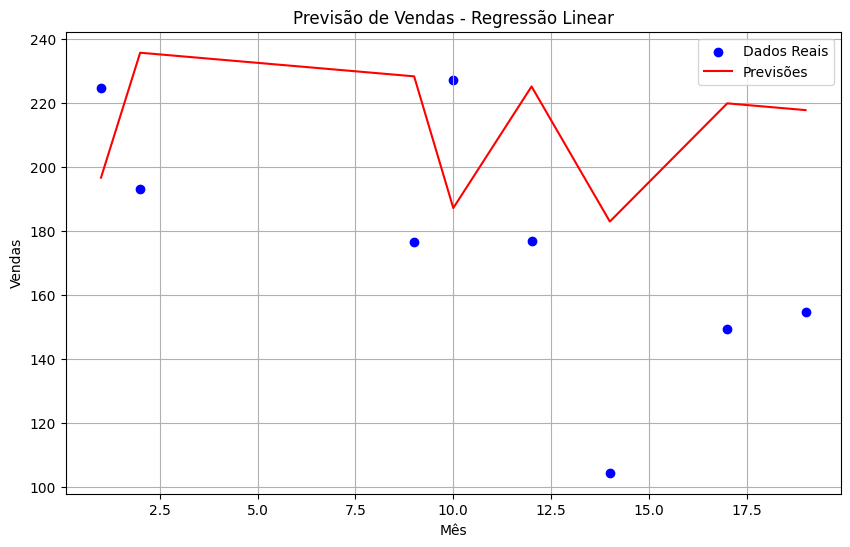

In [25]:
# Geração do gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_resultado['Meses'], df_resultado['Reais'], color='blue', label='Dados Reais')
plt.plot(df_resultado['Meses'], df_resultado['Previsoes'], color='red', label='Previsões')
plt.title('Previsão de Vendas - Regressão Linear')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()

# Detecção de Fraude

Construção de um modelo de classificação, utilizando regressão logística, para detectar possíveis fraudes em transações financeiras.

In [26]:
# Criação e manipulação base de dados fictícia com transações financeiras e uma variável indicativa de fraude
np.random.seed(42)
valores = np.random.normal(1000, 200, 1000)
locais = np.random.choice(['Local_A', 'Local_B', 'Local_C'], size=1000)
fraudes = np.random.choice([0, 1], size=1000)  # 0 = Não fraude, 1 = Fraude
df_fraudes = pd.DataFrame({
    'Valores': valores,
    'Locais': locais,
    'Fraude': fraudes
})

In [27]:
# pré processamento dos dados, convertendo os dados de variáveis categóricas em variáveis numéricas e dividindo os dados.
df_fraudes = pd.get_dummies(df_fraudes, columns=['Locais'])
X_fraudes = df_fraudes.drop('Fraude', axis=1)
y_fraudes = df_fraudes['Fraude']

X_train_fraudes, X_test_fraudes, y_train_fraudes, y_test_fraudes = train_test_split(X_fraudes, y_fraudes, test_size=0.3, random_state=42)

In [29]:
# Construção e Avaliação do Modelo de regressão logística.
model_fraudes = LogisticRegression()
model_fraudes.fit(X_train_fraudes, y_train_fraudes)
y_pred_fraudes = model_fraudes.predict(X_test_fraudes)
accuracy_fraudes = accuracy_score(y_test_fraudes, y_pred_fraudes)
confusion = confusion_matrix(y_test_fraudes, y_pred_fraudes)
report = classification_report(y_test_fraudes, y_pred_fraudes)

print(f'Acurácia do modelo: {accuracy_fraudes}')
print('Matriz de Confusão:')
print(confusion)
print('Relatório de Classificação:')
print(report)

Acurácia do modelo: 0.49666666666666665
Matriz de Confusão:
[[120  23]
 [128  29]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       143
           1       0.56      0.18      0.28       157

    accuracy                           0.50       300
   macro avg       0.52      0.51      0.45       300
weighted avg       0.52      0.50      0.44       300

